In [1]:
import tensorflow as tf
from utils import get_filenames, train_dev_split, get_labels
from data import train_input_fn, eval_input_fn, predict_input_fn
from model import model_func
from visualize import plot_decoder_out, plot_some_imgs

%matplotlib inline

In [2]:
TRAIN_DATA_DIR = './datasets/train/'
DEV_DATA_DIR = './datasets/devset/'

IMG_SIZE = (32, 32)
BATCH_SIZE = 16
BUFFER_SIZE = 2000
EPOCHS = 30

LATENT_DIMS = 400

In [3]:
train_dev_split(TRAIN_DATA_DIR, DEV_DATA_DIR)

Moving 5000 files


In [3]:
STEPS = EPOCHS * (len(get_filenames(TRAIN_DATA_DIR, shuffle=True, is_test=True)) // BATCH_SIZE)

In [4]:
print('Number of Steps: {}\tBatches Per Epoch: {}\tNumber of Epochs: {}'.format(
    STEPS, STEPS // EPOCHS, EPOCHS))

Number of Steps: 84360	Batches Per Epoch: 2812	Number of Epochs: 30


Displaying 100 images


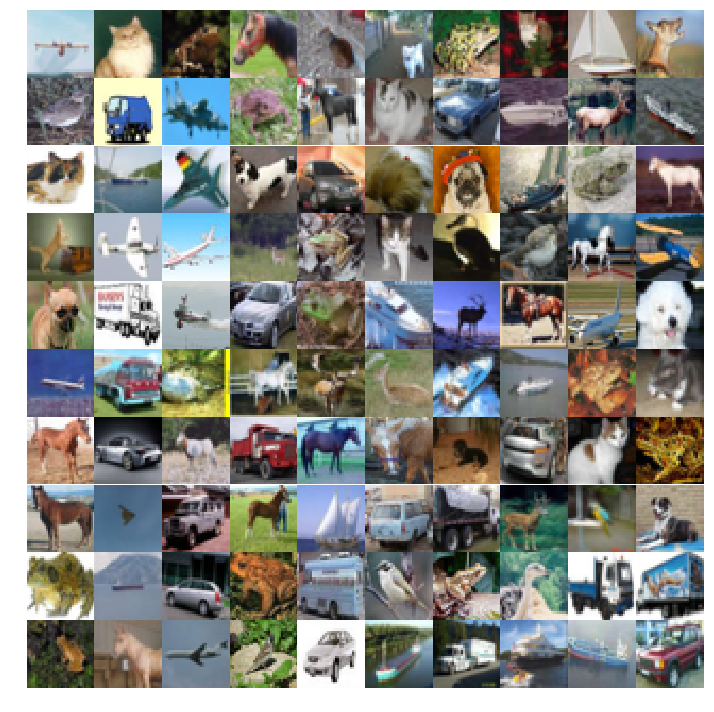

In [5]:
plot_some_imgs(TRAIN_DATA_DIR)

In [5]:
vae = tf.estimator.Estimator(model_fn=model_func,
                             params={'latent_dims': LATENT_DIMS,
                                     'batch_size': BATCH_SIZE,
                                     'out_channels': 3,
                                     'steps_per_epoch': STEPS // EPOCHS,
                                     'decay_steps': STEPS // 20,
                                     'lr_decay': False,
                                     'lr': 0.0001},
                             model_dir='./vae_400')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_task_id': 0, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3e24e1e4e0>, '_save_checkpoints_steps': None, '_model_dir': './vae_400', '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_master': '', '_num_worker_replicas': 1, '_evaluation_master': '', '_train_distribute': None, '_session_config': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0}


In [ ]:
vae.train(input_fn=lambda: train_input_fn(TRAIN_DATA_DIR,
                                          IMG_SIZE,
                                          BATCH_SIZE,
                                          BUFFER_SIZE),
          steps=STEPS)

In [7]:
vae.evaluate(input_fn=lambda: eval_input_fn(DEV_DATA_DIR,
                                            IMG_SIZE,
                                            BATCH_SIZE,
                                            BUFFER_SIZE))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-20-19:59:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./vae_400/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-20-20:00:21
INFO:tensorflow:Saving dict for global step 84361: global_step = 84361, loss = 1740.798


{'global_step': 84361, 'loss': 1740.798}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./vae_400/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


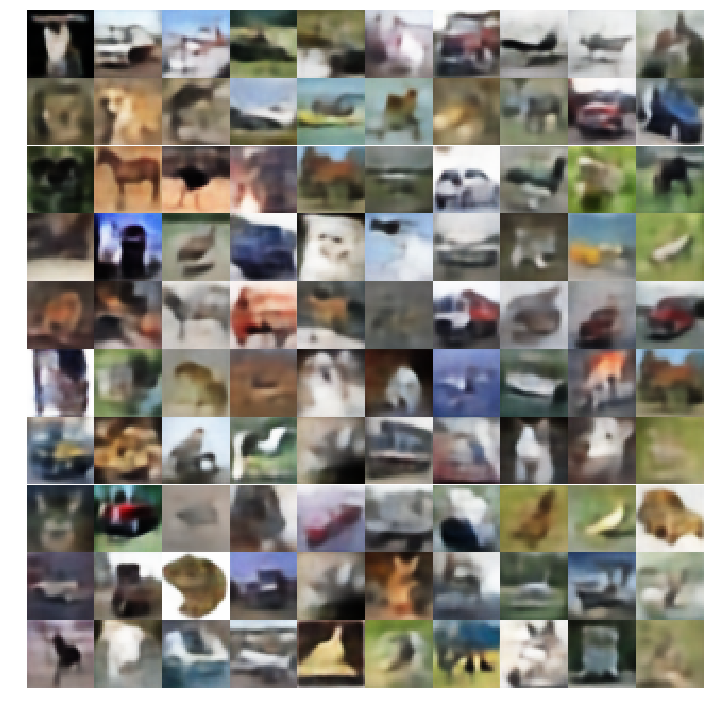

In [7]:
preds = vae.predict(input_fn=lambda: predict_input_fn(DEV_DATA_DIR,
                                                      IMG_SIZE,
                                                      BATCH_SIZE,
                                                      BUFFER_SIZE))
plot_decoder_out(preds)